In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rc
from matplotlib import font_manager
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(10, 5))

# font_path = 'C:\\Windows\\Fonts\\NanumBarunGothicUltraLight.ttf' #한글 폰트 경로 
font_path = 'C:\\Windows\\Fonts\\malgun.ttf' #한글 폰트 경로 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [9]:
price = pd.read_csv('비용합친거.csv',encoding='euc-kr')

In [129]:
price['평균비용'] = (price['최저비용']+price['최고비용'])/2

In [130]:
price.dropna(inplace=True)

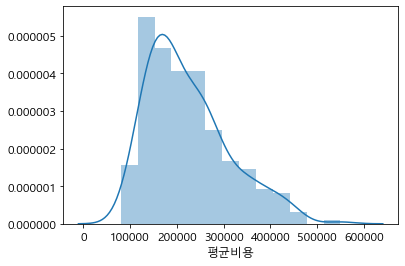

In [131]:
sns.distplot(price['평균비용'])

Text(0.5, 0, '')

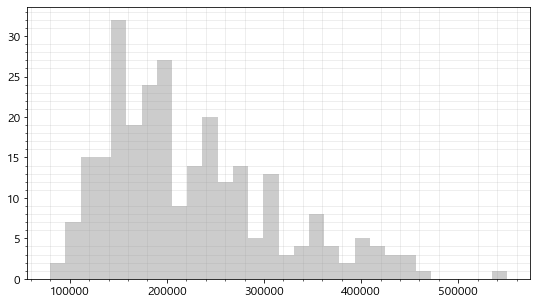

In [132]:
plt.figure(figsize=(9, 5))
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
a=sns.distplot(price['평균비용'], bins=30,hist=True,kde=False,rug=False,
              color='gray')
plt.xlabel('')

In [133]:
price.pivot_table(index='시도명',values=['최저비용','최고비용','평균비용'],aggfunc='mean')

,최고비용,최저비용,평균비용
시도명,,,
강원,201985.714286,169700.000000,185842.857143
경기,265678.947368,235187.719298,250433.333333
경남,212404.000000,190022.000000,201213.000000
경북,188076.923077,171923.076923,180000.000000
광주,158673.500000,144049.000000,151361.250000
대구,226364.666667,195133.333333,210749.000000
대전,201467.500000,150000.000000,175733.750000
부산,222472.142857,186740.357143,204606.250000
서울,327363.137255,287430.196078,307396.666667


In [134]:
bins = np.percentile(price['평균비용'], q=[20,40,60,80])

In [135]:
a=np.digitize(price['평균비용'], bins)

In [136]:
import collections, numpy
collections.Counter(a)

Counter({4: 54, 3: 53, 2: 66, 1: 49, 0: 44})

In [137]:
58+58+67+55+52

290

In [140]:
price['그룹']=a

In [141]:
price.columns

Index(['사업장명', '시도명', '의료인수', '입원실수', '병상수', '진료과목내용명', '의사총수', '일반의의사수',
       '인턴의사수', '레지던트의사수', '전문의합계', '내과', '신경과', '정신건강의학과', '외과', '정형외과',
       '신경외과', '흉부외과', '성형외과', '마취통증의학과', '산부인과', '소아청소년과', '안과', '이비인후과',
       '피부과', '비뇨의학과', '영상의학과', '방사선종양학과', '병리과', '진단검사의학과', '재활의학과', '핵의학과',
       '가정의학과', '응급의학과', '직업환경의학과', '예방의학과', '구강악안면외과', '치과보철과', '치과교정과',
       '소아치과', '치주과', '치과보존과', '구강내과', '예방치과', '통합치의학과', '한방내과', '한방부인과',
       '의료장비합계', '한방신경정신과', '침구과', '한방재활의학과', '최종보정점수', '진료과목수', '4항목합', '진료합',
       '진료과목수_전문의', '사업장명.1', '분류', '명칭', '최저비용', '최고비용', '진료만족도', '의료진친절도',
       '시설만족도', '평균비용', '그룹'],
      dtype='object')

In [142]:
price1 = price[['사업장명', '시도명', '의료인수', '입원실수', '병상수','의사총수', '일반의의사수',
       '인턴의사수', '레지던트의사수', '전문의합계', '내과', '신경과', '정신건강의학과', '외과', '정형외과',
       '신경외과', '흉부외과', '성형외과', '마취통증의학과', '산부인과', '소아청소년과', '안과', '이비인후과',
       '피부과', '비뇨의학과', '영상의학과', '방사선종양학과', '병리과', '진단검사의학과', '재활의학과', '핵의학과',
       '가정의학과', '응급의학과', '직업환경의학과', '예방의학과', '구강악안면외과', '치과보철과', '치과교정과',
       '소아치과', '치주과', '치과보존과', '구강내과', '예방치과', '통합치의학과', '한방내과', '한방부인과',
       '의료장비합계', '한방신경정신과', '최종보정점수','진료과목수', '4항목합', '진료합',
       '진료과목수_전문의','평균비용', '진료만족도', '의료진친절도','시설만족도','그룹']]

In [143]:
pd.set_option('display.max_columns', 500)
tables = price1.pivot_table(index='그룹')
tables

,4항목합,가정의학과,구강내과,구강악안면외과,내과,레지던트의사수,마취통증의학과,방사선종양학과,병리과,병상수,비뇨의학과,산부인과,성형외과,소아청소년과,소아치과,시설만족도,신경과,신경외과,안과,영상의학과,예방의학과,예방치과,외과,응급의학과,의료인수,의료장비합계,의료진친절도,의사총수,이비인후과,인턴의사수,일반의의사수,입원실수,재활의학과,전문의합계,정신건강의학과,정형외과,직업환경의학과,진단검사의학과,진료과목수,진료과목수_전문의,진료만족도,진료합,최종보정점수,치과교정과,치과보존과,치과보철과,치주과,통합치의학과,평균비용,피부과,한방내과,한방부인과,한방신경정신과,핵의학과,흉부외과
그룹,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,31.840909,1.204545,0.000000,0.090909,6.045455,1.045455,1.590909,0.000000,0.204545,267.113636,0.704545,1.068182,0.272727,1.022727,0.000000,8.861364,1.250000,1.727273,0.295455,2.136364,0.022727,0.000000,2.181818,2.545455,129.863636,34.295455,8.820455,32.159091,0.500000,0.227273,1.590909,71.068182,0.500000,28.977273,0.659091,2.863636,0.568182,0.909091,14.568182,13.681818,8.990909,28.977273,2.524227,0.000000,0.000000,0.068182,0.000000,0.045455,122649.090909,0.181818,0.022727,0.000000,0.000000,0.045455,0.227273
1,51.163265,1.551020,0.000000,0.122449,9.142857,5.775510,2.387755,0.183673,0.571429,352.795918,1.061224,1.367347,0.326531,1.530612,0.000000,8.502041,1.653061,2.224490,0.591837,3.306122,0.102041,0.000000,3.224490,3.775510,200.122449,44.693878,8.793878,51.714286,0.816327,1.714286,1.265306,95.959184,0.571429,42.408163,0.959184,3.979592,0.693878,1.102041,16.306122,14.979592,8.963265,42.408163,2.668875,0.000000,0.000000,0.040816,0.000000,0.000000,157788.163265,0.183673,0.000000,0.000000,0.000000,0.122449,0.816327
2,78.469697,1.833333,0.015152,0.272727,14.621212,12.242424,2.954545,0.333333,1.075758,355.484848,1.500000,2.515152,0.606061,2.878788,0.015152,9.168182,2.287879,2.893939,1.121212,3.833333,0.000000,0.000000,4.636364,4.318182,308.727273,55.530303,9.221212,79.030303,1.454545,4.333333,1.712121,99.333333,1.106061,60.181818,1.378788,4.363636,0.848485,1.257576,17.454545,16.787879,9.339394,60.181818,2.711166,0.000000,0.015152,0.060606,0.030303,0.015152,198987.878788,0.454545,0.045455,0.000000,0.015152,0.348485,1.060606
3,193.811321,3.000000,0.018868,0.584906,32.396226,46.735849,7.245283,1.452830,3.000000,577.226415,3.188679,4.698113,1.811321,6.207547,0.037736,9.145283,4.528302,5.377358,3.490566,8.716981,0.301887,0.000000,10.037736,5.867925,693.301887,79.735849,9.067925,194.943396,3.396226,16.056604,2.226415,160.094340,2.547170,128.792453,2.867925,7.396226,1.716981,2.528302,20.132075,19.000000,9.086792,128.792453,2.957287,0.075472,0.132075,0.169811,0.075472,0.000000,257142.830189,1.528302,0.018868,0.000000,0.018868,1.018868,3.301887
4,351.018519,5.055556,0.000000,1.351852,53.537037,103.648148,12.351852,2.648148,5.870370,720.240741,5.000000,8.703704,3.407407,10.703704,0.129630,9.212963,7.481481,7.444444,6.240741,18.018519,0.111111,0.018519,17.611111,7.907407,1142.481481,105.740741,9.266667,351.592593,5.388889,28.870370,3.592593,204.518519,3.296296,214.907407,5.203704,10.407407,0.759259,4.296296,24.000000,23.000000,9.137037,214.907407,2.814585,0.518519,0.462963,0.833333,0.407407,0.018519,362502.777778,2.740741,0.000000,0.018519,0.000000,1.981481,4.962963


In [ ]:
'전문의합계','병상수','평균비용','최종보정점수','진료과목수','의료장비합계'

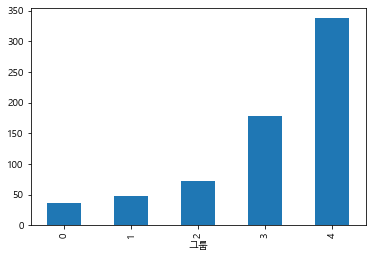

In [67]:
tables['4항목합'].plot(kind='bar')

In [145]:
tables.reset_index(inplace=True)

In [148]:
tables[['진료만족도', '의료진친절도','시설만족도']]

,진료만족도,의료진친절도,시설만족도
0,8.990909,8.820455,8.861364
1,8.963265,8.793878,8.502041
2,9.339394,9.221212,9.168182
3,9.086792,9.067925,9.145283
4,9.137037,9.266667,9.212963


In [79]:
tables['로그점수']=np.log(tables['최종보정점수'])

In [85]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRE.TTF").get_name() #혁님이 요청하신 'HY고딕' 입니다!
rc('font', family=font_name)

In [100]:
color_palette_list = ['#0099CC', '#ADD8E6', '#63D1F4', 
                      '#C1F0F6', '#009ACD','#0EBFE9']

In [150]:
high = price[price.그룹==4]
low= price[price.그룹==0]

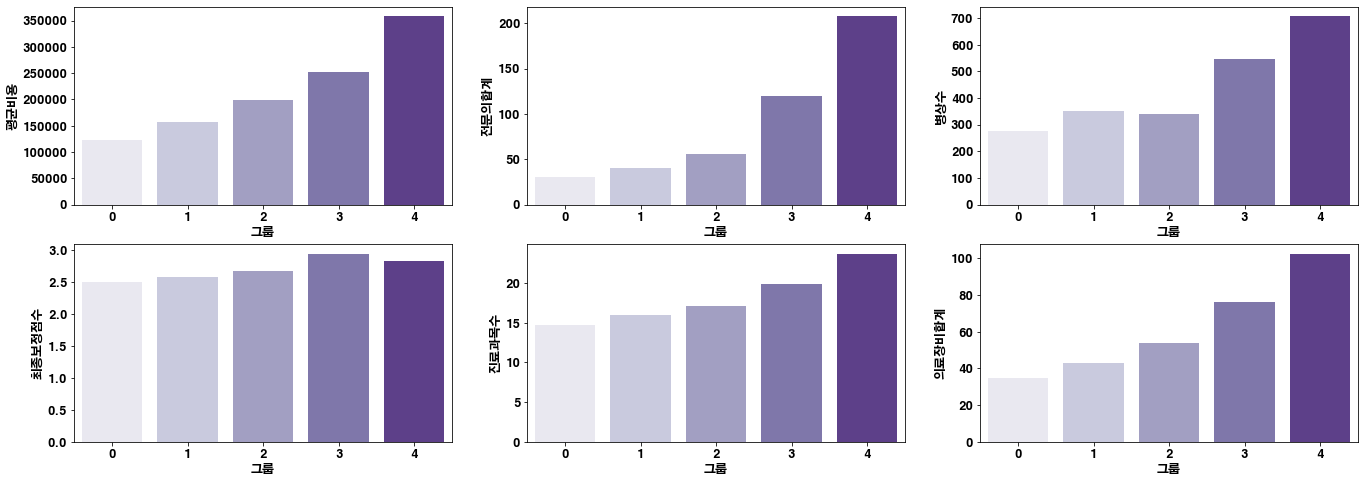

In [126]:
plt.rcParams['font.size']=12
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(23,8)

sns.barplot(data=tables, x="그룹", y="평균비용", ax=ax1, palette='Purples')
sns.barplot(data=tables, x="그룹", y="전문의합계", ax=ax2,palette='Purples')
sns.barplot(data=tables, x="그룹", y="병상수", ax=ax3,palette='Purples')
sns.barplot(data=tables, x="그룹", y="최종보정점수", ax=ax4,palette='Purples')
sns.barplot(data=tables, x="그룹", y="진료과목수", ax=ax5,palette='Purples')
sns.barplot(data=tables, x="그룹", y="의료장비합계", ax=ax6,palette='Purples')

In [152]:
high.reset_index(inplace=True)
high

,index,사업장명,시도명,의료인수,입원실수,병상수,진료과목내용명,의사총수,일반의의사수,인턴의사수,레지던트의사수,전문의합계,내과,신경과,정신건강의학과,외과,정형외과,신경외과,흉부외과,성형외과,마취통증의학과,산부인과,소아청소년과,안과,이비인후과,피부과,비뇨의학과,영상의학과,방사선종양학과,병리과,진단검사의학과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과,구강악안면외과,치과보철과,치과교정과,소아치과,치주과,치과보존과,구강내과,예방치과,통합치의학과,한방내과,한방부인과,의료장비합계,한방신경정신과,침구과,한방재활의학과,최종보정점수,진료과목수,4항목합,진료합,진료과목수_전문의,사업장명.1,분류,명칭,최저비용,최고비용,진료만족도,의료진친절도,시설만족도,평균비용,그룹
0,1,이화여자대학교의과대학부속서울병원,서울,796,303,653,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, 마취통증의학과, 산부인과, 소아청소년과, 안과, 이비인후과, 피부과, 비뇨의학과, 영상의학과, 방사선종양학과, 병리과, 진단검사의학과, 재활의학과, 가정의학과, 핵의학과, 직업환경의학과, 응급의학과, 구강악안면외과, 치과보존과",182,1,0,0,181,43,8,2,15,11,9,4,2,13,8,9,2,4,2,3,13,2,3,4,2,2,3,14,0,0,2,0,0,0,0,1,0,0,0,0,0,107.0,0,0,0,3.244260,25,182,181,25,이화여자대학교의과대학부속서울병원,상급병실료,1인실,310000.0,405000.0,10.0,10.0,10.0,357500.0,4
1,7,순천향대학교 부속 서울병원,서울,917,175,725,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, 마취통증의학과, 산부인과, 소아청소년과, 안과, 이비인후과, 피부과, 비뇨의학과, 영상의학과, 방사선종양학과, 병리과, 진단검사의학과, 재활의학과, 가정의학과, 핵의학과, 직업환경의학과, 응급의학과, 예방의학과, 구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과, 구강내과, 영상치의학과, 구강병리과, 예방치과",355,2,38,119,197,59,5,4,11,11,5,4,4,8,9,9,7,5,2,5,13,2,5,6,3,2,6,6,2,1,1,1,1,0,0,0,0,0,0,0,0,110.0,0,0,0,2.650779,34,356,197,28,순천향대학교 부속 서울병원,상급병실료,1인실,200000.0,460000.0,9.1,8.8,8.8,330000.0,4
2,8,강북삼성병원,서울,946,174,689,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, 마취통증의학과, 산부인과, 소아청소년과, 안과, 이비인후과, 피부과, 비뇨의학과, 영상의학과, 방사선종양학과, 병리과, 진단검사의학과, 재활의학과, 가정의학과, 핵의학과, 직업환경의학과, 응급의학과, 구강악안면외과, 치과보철과, 치과교정과, 치주과, 치과보존과",388,6,30,131,221,59,6,7,20,8,5,3,3,8,7,7,6,5,4,6,19,2,10,4,3,3,6,6,9,0,1,3,1,0,0,0,0,0,0,0,0,91.0,0,0,0,3.109119,28,388,221,27,강북삼성병원,상급병실료,1인실,310000.0,310000.0,10.0,9.7,9.7,310000.0,4
3,10,이화여자대학교의과대학부속목동병원,서울,1285,215,700,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, 마취통증의학과, 산부인과, 소아청소년과, 안과, 이비인후과, 피부과, 비뇨의학과, 영상의학과, 방사선종양학과, 병리과, 진단검사의학과, 재활의학과, 가정의학과, 핵의학과, 직업환경의학과, 응급의학과, 구강악안면외과, 치과보철과, 치과교정과, 소아치과, 치주과, 치과보존과",392,1,38,154,200,39,8,3,21,8,5,6,4,13,8,10,5,6,2,4,16,4,4,4,3,2,3,9,2,0,3,2,2,1,2,1,0,0,0,0,0,117.0,0,0,0,2.610706,29,393,200,30,이화여자대학교의과대학부속목동병원,상급병실료,1인실,381000.0,381000.0,9.1,10.0,10.0,381000.0,4
4,12,서울대학교병원,서울,3708,554,1763,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, 마취통증의학과, 산부인과, 소아청소년과, 안과, 이비인후과, 피부과, 비뇨의학과, 영상의학과, 방사선종양학과, 병리과, 진단검사의학과, 재활의학과, 가정의학과, 핵의학과, 응급의학과, 치과",1612,16,185,578,831,174,35,39,67,35,34,23,11,46,32,59,29,17,12,16,81,8,23,15,13,6,26,30,0,0,0,0,0,0,0,0,0,0,0,0,0,292.0,0,0,0,3.103210,23,1610,831,23,서울대학교병원,상급병실료,1인실,431000.0,450000.0,9.5,9.7,10.0,440500.0,4
5,14,재단법인아산사회복지재단 서울아산병원,서울,6025,986,2705,"치과보존과, 치주과, 소아치과, 치과교정과, 치과보철과, 구강악안면외과, 응급의학과, 핵의학과, 가정의학과, 재활의학과, 진단검사의학과, 병리과, 방사선종양학과, 영상의학과, 비뇨의학과, 피부과, 이비인후과, 안과, 소아청소년과, 산부인과, 마취통증의학과, 성형외과, 흉부외과, 신경외과, 정형외과, 외과, 정신건강의학과, 신경과, 내과",1658,23,131,448,1056,299,35,15,116,34,22,32,15,70,30,51,26,20,9,17,126,15,33,15,11,12,16,19,0,0,4,4,2,2,4,2,0,0,0,0,0,339.0,0,0,0,3.341637,28,1658,1056,29,재단법인아산사회복지재단 서울아산병원,상급병실료,1인실,410000.0,460000.0,9.9,9.7,9.8,435000.0,4
6,15,학교법인 고려중앙학원 고려대학교의과대학부속병원(안암병원),서울,1665,262,1048,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, 마취통증의학과, 산부인과, 소아청소년과, 안과, 이비인후과, 피부과, 비뇨의학과, 영상의학과, 방사선종양학과, 병리과, 진단검사의학과, 재활의학과, 가정의학과, 핵의학과, 응급의학과, 구강악안면외과, 치과보철과, 치과교정과, 치주과, 치과보존과",516,5,38,161,314,89,14,6,25,15,10,10,6,18,11,9,8,9,4,9,22,3,5,6,6,3,9,9,0,0,2,2,2,0,1,1,0,0,0,0,0,166.0,0,0,0,3.456209,27,518,314,28,학교법인 고려중앙학원 고려대학교의과대학부속병원(안암병원),상급병실료,1인실,420000.0,420000.0,8.8,9.3,9.0,420000.0,4
7,17,고려대학교의과대학부속구로병원,서울,1514,246,1075,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, 마취통증의학과, 산부인과, 소아청소년과, 안과, 이비인후과, 피부과, 비뇨의학과, 영상의학과, 방사선종양학과, 병리과, 진단검사의학과, 재활의학과, 가정의학과, 핵의학과, 응급의학과, 구강악안면외과, 치과보철과, 치과교정과, 치과보존과, 예방치과",524,1,28,166,329,89,10,7,26,21,9,5,6,20,13,13,10,8,3,5,27,3,10,6,6,3,7,12,0,0,3,3,2,0,0,1,0,1,0,0,0,141.0,0,0,0,2.847185,27,524,329,28,고려대학교의과대학부속구로병원,상급병실료,1인실,220000.0,460000.0,10.0,10.0,10.0,340000.0,4
8,19,중앙대학교병원,서울,1296,204,807,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, 마취통증의학과, 산부인과, 소아청소년과, 안과, 이비인후과, 피부과, 비뇨의학과, 영상의학과, 방사선종양학과, 병리과, 진단검사의학과, 재활의학과, 가정의학

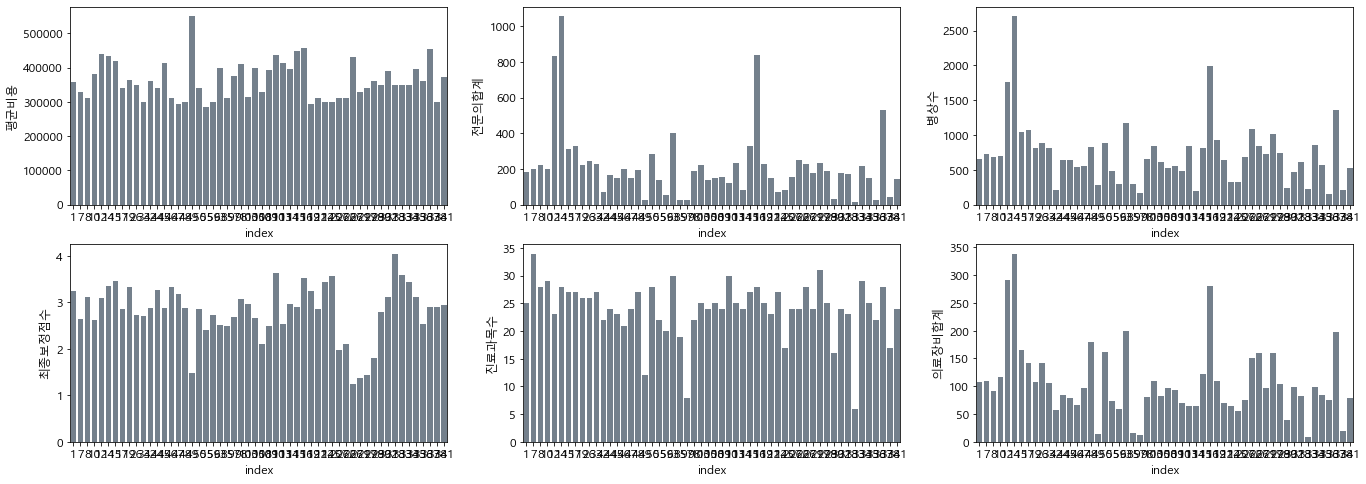

In [157]:
plt.rcParams['font.size']=12
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(23,8)

sns.barplot(data=high, x="index", y="평균비용", ax=ax1, color='slategray')
sns.barplot(data=high, x="index", y="전문의합계", ax=ax2, color='slategray')
sns.barplot(data=high, x="index", y="병상수", ax=ax3,color='slategray')
sns.barplot(data=high, x="index", y="최종보정점수", ax=ax4, color='slategray')
sns.barplot(data=high, x="index", y="진료과목수", ax=ax5, color='slategray')
sns.barplot(data=high, x="index", y="의료장비합계", ax=ax6, color='slategray')

In [ ]:
low.reset_index(inplace=True)

In [16]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRE.TTF").get_name() #혁님이 요청하신 'HY고딕' 입니다!
rc('font', family=font_name)

[Text(0.5, 0, '')]

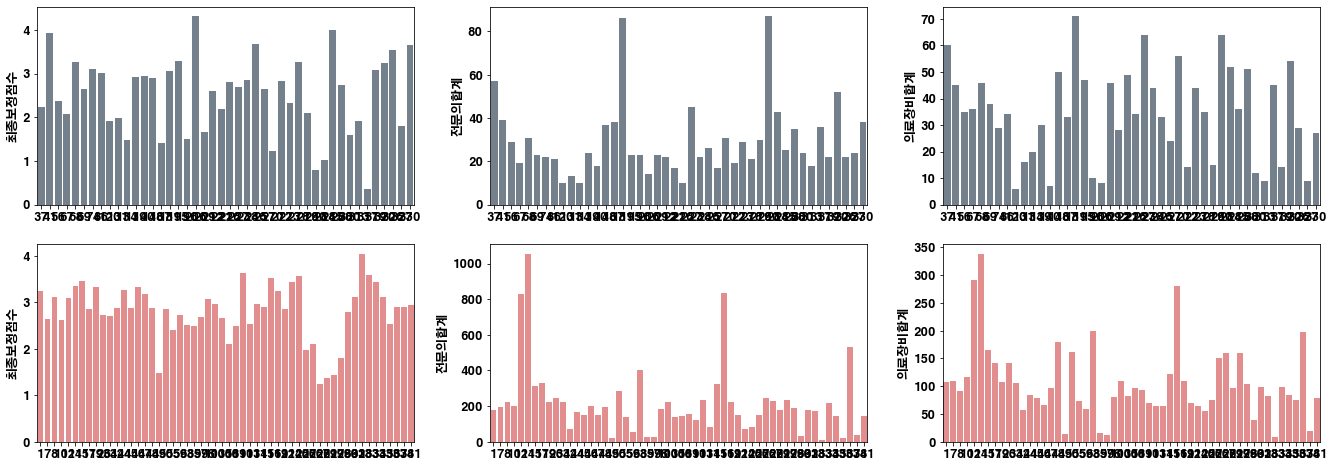

In [187]:
plt.rcParams['font.size']=12
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(23,8)

sns.barplot(data=low, x="index", y="최종보정점수", ax=ax1, color='slategray').set(xlabel='')
sns.barplot(data=low, x="index", y="전문의합계", ax=ax2, color='slategray').set(xlabel='')
sns.barplot(data=low, x="index", y="의료장비합계", ax=ax3,color='slategray').set(xlabel='')
sns.barplot(data=high, x="index", y="최종보정점수", ax=ax4, color='lightcoral').set(xlabel='')
sns.barplot(data=high, x="index", y="전문의합계", ax=ax5, color='lightcoral').set(xlabel='')
sns.barplot(data=high, x="index", y="의료장비합계", ax=ax6, color='lightcoral').set(xlabel='')

In [56]:
import collections, numpy
collections.Counter(price1[price1['그룹']==4]['시도명'])

Counter({'서울': 29,
         '경기': 22,
         '경남': 2,
         '인천': 1,
         '부산': 1,
         '전남': 1,
         '충남': 1,
         '대구': 1})

In [58]:
import collections, numpy
collections.Counter(price1[price1['그룹']==0]['시도명'])

Counter({'충북': 2,
         '서울': 3,
         '경기': 7,
         '강원': 4,
         '경남': 5,
         '광주': 6,
         '부산': 1,
         '대전': 1,
         '울산': 2,
         '전남': 4,
         '인천': 4,
         '경북': 2,
         '전북': 5,
         '대구': 4,
         '충남': 2})

In [10]:
price1 = price[price.간호사총수>0]

In [11]:
price1

,사업장명,시도명,의료인수,입원실수,병상수,진료과목내용명,의사총수,간호사총수,간호사1명당병상수,의사1명당병상수,...,진료합,진료과목수_전문의,사업장명.1,분류,명칭,최저비용,최고비용,진료만족도,의료진친절도,시설만족도
1,이화여자대학교의과대학부속서울병원,서울,796,303,653,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",182,614,1.063518,3.587912,...,181,25,이화여자대학교의과대학부속서울병원,상급병실료,1인실,310000.0,405000.0,10.0,10.0,10.0
2,학교법인연세대학교의과대학세브란스병원,서울,4758,823,2455,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",1183,3575,0.686713,2.075232,...,828,25,학교법인연세대학교의과대학세브란스병원,상급병실료,1인실,104000.0,457000.0,9.7,9.4,9.6
3,의료법인동신의료재단 동신병원,서울,112,59,207,"내과, 신경과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인과, 비뇨의학과,...",21,91,2.274725,9.857143,...,18,10,의료법인동신의료재단 동신병원,상급병실료,1인실,200000.0,200000.0,10.0,10.0,10.0
4,서울특별시서울의료원,서울,840,168,623,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",224,616,1.011364,2.781250,...,124,22,서울특별시서울의료원,상급병실료,1인실,218000.0,230000.0,8.2,7.8,7.8
5,성애의료재단 성애병원,서울,336,85,275,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인...",83,253,1.086957,3.313253,...,63,19,성애의료재단 성애병원,상급병실료,1인실,170000.0,345000.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,의료법인인화재단한국병원,경기,176,89,389,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 마취통증의학...",81,95,4.094737,4.802469,...,65,19,의료법인인화재단한국병원,NaN,NaN,NaN,NaN,8.6,8.3,8.9
349,청주성모병원,충남,382,139,433,"예방의학과, 응급의학과, 가정의학과, 재활의학과, 진단검사의학과, 병리과, 영상의학...",104,278,1.557554,4.163462,...,77,19,청주성모병원,상급병실료,1인실,180000.0,180000.0,9.5,9.5,9.5
350,의료법인정산의료재단효성병원,충남,172,85,423,"이비인후과, 구강악안면외과, 응급의학과, 비뇨의학과, 예방의학과, 가정의학과, 재활...",49,123,3.439024,8.632653,...,46,20,의료법인정산의료재단효성병원,NaN,NaN,NaN,NaN,6.5,6.5,6.5
351,한림대학교동탄성심병원,NaN,1051,212,800,"치과보존과, 치과교정과, 치과보철과, 구강악안면외과, 응급의학과, 핵의학과, 가정의...",263,788,1.015228,3.041825,...,172,27,한림대학교동탄성심병원,상급병실료,1인실,400000.0,400000.0,9.5,9.6,9.6


In [12]:
price1.의사1명당병상수=price1.의사1명당병상수.astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [40]:
nurse = price1.pivot_table(index='시도명',values=['간호사1명당병상수'],aggfunc='median')
doctor = price1.pivot_table(index='시도명',values=['의사1명당병상수'],aggfunc='median')

In [41]:
nurse.reset_index(inplace=True)
doctor.reset_index(inplace=True)

In [45]:
nurse=nurse.sort_values(by='간호사1명당병상수')
doctor=doctor.sort_values(by='의사1명당병상수')

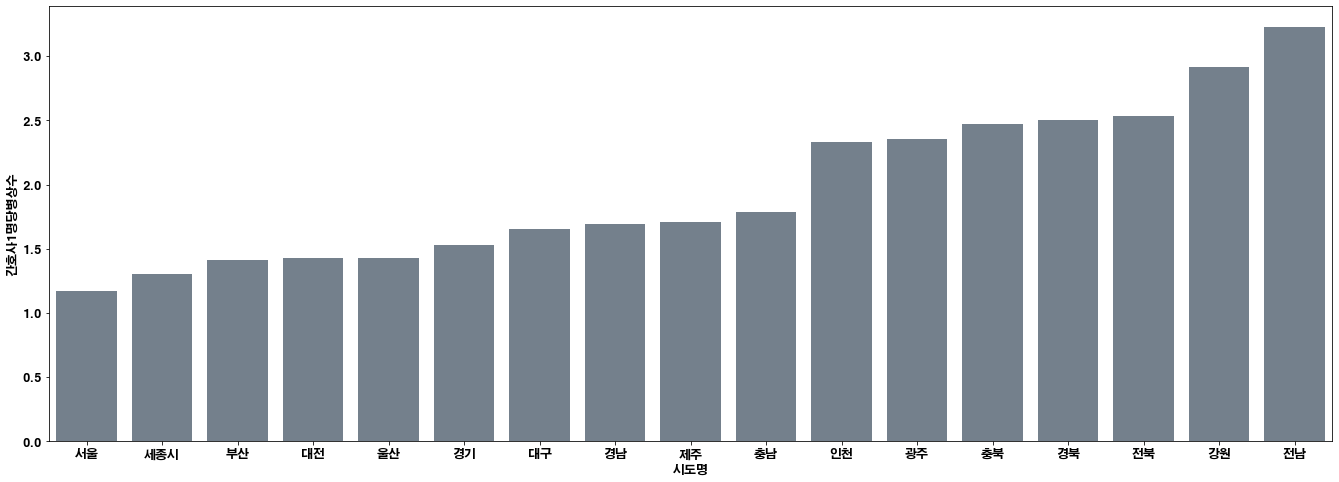

In [46]:
plt.rcParams['font.size']=12
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(23,8)
sns.barplot(data=nurse, x="시도명", y="간호사1명당병상수", color='slategray' ,ax= ax1)

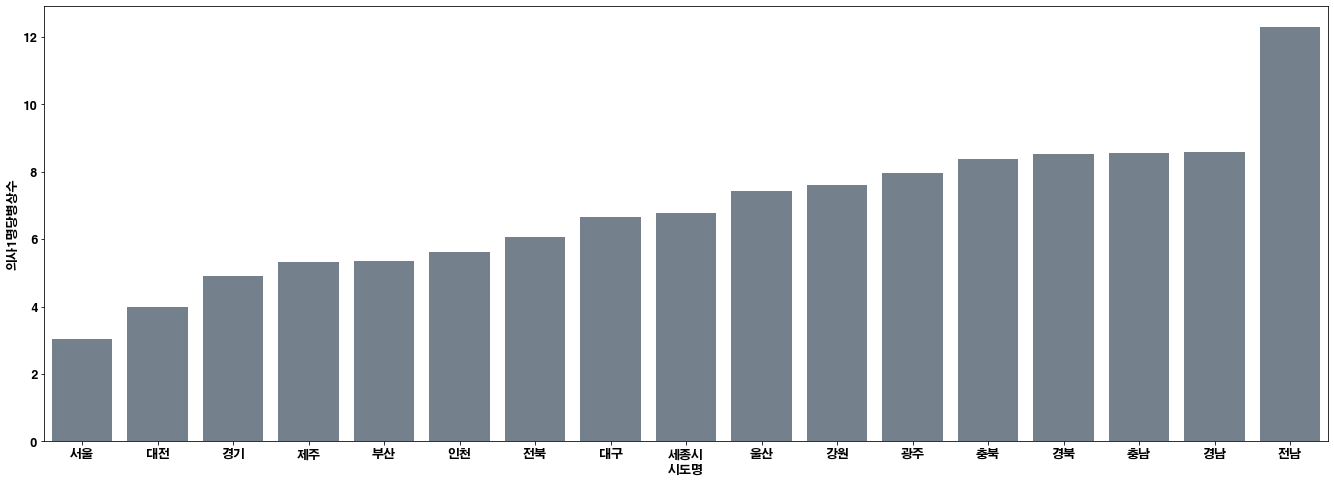

In [47]:
plt.rcParams['font.size']=12
figure, ((ax1)) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(23,8)
sns.barplot(data=doctor, x="시도명", y="의사1명당병상수", color='slategray' ,ax= ax1)

Text(0.5, 1.0, '간호사 1명당 병상수 (상위30곳)')

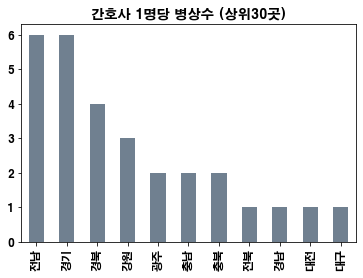

In [64]:
plt.rcParams['font.size']=11
price1.sort_values(by='간호사1명당병상수', ascending=False)[:30]['시도명'].value_counts().plot(kind='bar',color='slategray')
plt.title('간호사 1명당 병상수 (상위30곳)')

In [70]:
price1.sort_values(by='간호사1명당병상수', ascending=False)[:30]['간호사1명당병상수'].median()

6.020886798

In [71]:
price1.sort_values(by='간호사1명당병상수', ascending=True)[:30]['간호사1명당병상수'].median()

0.7707920625

In [77]:
price1.sort_values(by='의사1명당병상수', ascending=False)[:30]['의사1명당병상수'].median()

15.626984125

In [78]:
price1.sort_values(by='의사1명당병상수', ascending=True)[:30]['의사1명당병상수'].median()

2.0131997285

Text(0.5, 1.0, '간호사 1명당 병상수 (하위30곳)')

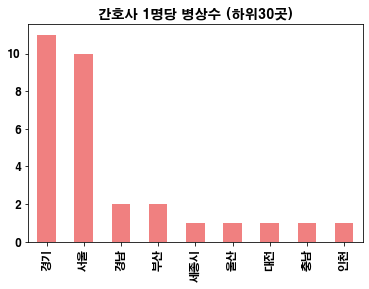

In [72]:
plt.rcParams['font.size']=11
price1.sort_values(by='간호사1명당병상수', ascending=True)[:30]['시도명'].value_counts().plot(kind='bar',color='lightcoral')
plt.title('간호사 1명당 병상수 (하위30곳)')

Text(0.5, 1.0, '의사 1명당 병상수 (상위30곳)')

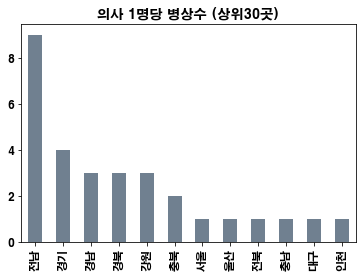

In [73]:
plt.rcParams['font.size']=11
price1.sort_values(by='의사1명당병상수', ascending=False)[:30]['시도명'].value_counts().plot(kind='bar',color='slategray')
plt.title('의사 1명당 병상수 (상위30곳)')

Text(0.5, 1.0, '의사 1명당 병상수 (하위30곳)')

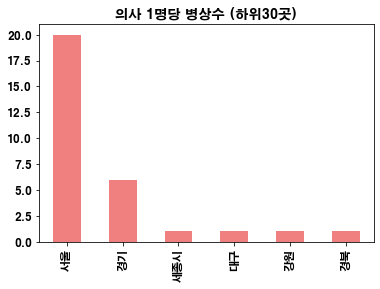

In [74]:
plt.rcParams['font.size']=11
price1.sort_values(by='의사1명당병상수', ascending=True)[:30]['시도명'].value_counts().plot(kind='bar',color='lightcoral')
plt.title('의사 1명당 병상수 (하위30곳)')

In [79]:
price.sort_values(by='간호사1명당병상수', ascending=False)[:30]

,사업장명,시도명,의료인수,입원실수,병상수,진료과목내용명,의사총수,간호사총수,간호사1명당병상수,의사1명당병상수,...,진료합,진료과목수_전문의,사업장명.1,분류,명칭,최저비용,최고비용,진료만족도,의료진친절도,시설만족도
247,안동성소병원,경기,72,166,705,"직업환경의학과, 재활의학과, 예방의학과, 정신건강의학과, 응급의학과, 신경과, 흉부...",59,13,54.230769,11.949153,...,59,22,안동성소병원,상급병실료,1인실,136000.0,176000.0,9.0,9.0,9.0
256,순천향대학교 부속 구미병원,경북,96,92,340,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 흉부외과, 성형외과, ...",78,18,18.888889,4.358974,...,67,21,순천향대학교 부속 구미병원,상급병실료,1인실,140000.0,220000.0,9.3,9.3,9.3
344,의료법인 원광의료재단 원광종합병원,충북,34,61,252,"내과, 신경과, 외과, 정형외과, 신경외과, 마취통증의학과, 소아청소년과, 영상의학...",16,18,14.000000,15.750000,...,17,12,의료법인 원광의료재단 원광종합병원,상급병실료,1인실,180000.0,180000.0,8.7,8.7,8.7
120,부천대성병원,경기,31,56,202,"내과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인과, 이비인후과, 피부과,...",12,19,10.631579,16.833333,...,10,9,부천대성병원,상급병실료,1인실,70000.0,220000.0,10.0,8.0,6.5
313,전주고려병원,경북,48,80,281,"가정의학과, 신경외과, 신경과, 정형외과, 진단검사의학과, 마취통증의학과, 영상의학...",18,30,9.366667,15.611111,...,18,9,전주고려병원,상급병실료,1인실,100000.0,100000.0,10.0,10.0,10.0
220,의료법인영성의료재단고흥종합병원,전남,51,79,293,"한방내과, 재활의학과, 진단검사의학과, 영상의학과, 비뇨의학과, 안과, 소아청소년과...",19,32,9.156250,15.421053,...,17,11,의료법인영성의료재단고흥종합병원,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,안성성모병원,경기,61,61,248,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 신경외과, 마취통증의학과, 소아청...",32,29,8.551724,7.750000,...,32,14,안성성모병원,상급병실료,1인실,100000.0,200000.0,8.0,8.0,8.0
208,해남우리종합병원,전남,85,116,496,"내과, 신경과, 정신건강의학과, 외과, 정형외과, 마취통증의학과, 산부인과, 소아청...",26,59,8.406780,19.076923,...,24,15,해남우리종합병원,상급병실료,1인실,150000.0,150000.0,NaN,NaN,NaN
308,의료법인 예당의료재단 예산종합병원,충남,32,41,176,"내과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인과, 영상의학과, 진단검사의학과",10,22,8.000000,17.600000,...,10,8,의료법인 예당의료재단 예산종합병원,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,의료법인보광의료재단속초보광병원,강원,67,85,298,"내과, 정신건강의학과, 외과, 정형외과, 신경외과, 마취통증의학과, 산부인과, 소아...",21,46,6.478261,14.190476,...,19,13,의료법인보광의료재단속초보광병원,NaN,NaN,NaN,NaN,10.0,10.0,10.0


Text(0.5, 1.0, '간호사1명당병상수')

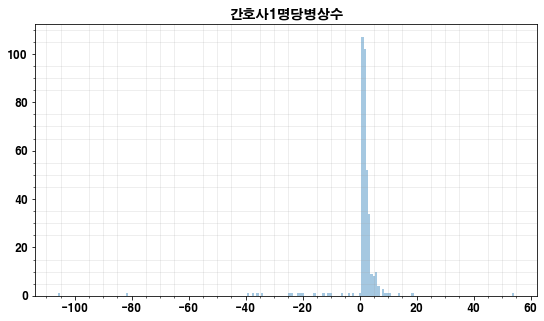

In [90]:
plt.figure(figsize=(9, 5))
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
a=sns.distplot(price['간호사1명당병상수'], bins=200,hist=True,kde=False,rug=False)
plt.xlabel('')
plt.title('간호사1명당병상수')